# Covid-19 Prediction - Tree Regression Algorithm 

Dataset is found from the website: https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence?resource=download.

### Importing Libraries

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

### Converting CSV File Into a Dataframe

In [29]:
df = pd.read_csv("Covid Dataset.csv")
df = df.replace({'Yes':1,'No':0})
print(df.head())

   Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0      

### Analyzing Raw Data and Performing Feature Selection

In [30]:
df.describe(include="all")

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [31]:
df2 = df.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)

In [32]:
correlation_matrix = df2.corr()
correlation_matrix
correlation_matrix.style.background_gradient(cmap='Blues', axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


In [33]:
dropped_features = list(("Running Nose", "Asthma", "Chronic Lung Disease", "Headache",
                        "Heart Disease", "Diabetes", "Hyper Tension", "Fatigue ", "Gastrointestinal "))
data = df2.drop(dropped_features, axis=1)
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,1,1,0,1
2,1,1,1,1,1,0,0,0,0,1
3,1,1,1,0,1,0,1,1,0,1
4,1,1,1,1,0,1,0,1,0,1


### Splitting Data Into Training and Testing Sets

In [34]:
x = data.drop("COVID-19", axis=1)
y = data["COVID-19"]
#80:20 split in data for training and testing
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.20)

### Training the Data Using Tree Regression

In [35]:
model = DecisionTreeRegressor()
fitted_model = model.fit(x_tr, y_tr)
print(fitted_model)

DecisionTreeRegressor()


### Predicting New Data

In [36]:
pred = fitted_model.predict(x_te)

### Calculating the Accuracy of Prediction

In [37]:
acc = fitted_model.score(x_te, y_te)
print("The accuracy of the predictions is: " + str(acc*100) + "%")

The accuracy of the predictions is: 86.56211219658157%


### Confusion Matrix of the Results

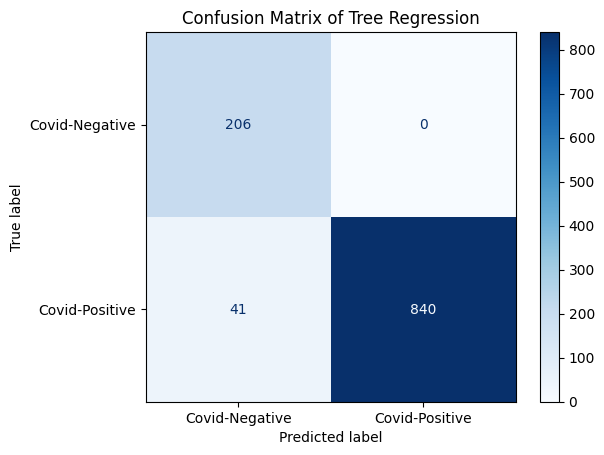

Accuracy = 96.23%
Precision = 100.0%
sensitivity = 95.35%
specificity = 100.0%


In [38]:
pred_int = [int(pred) for pred in pred] #converting decimals into ints
cm = metrics.confusion_matrix(y_te, pred_int)
cm_plt = ConfusionMatrixDisplay(cm, display_labels = ["Covid-Negative", "Covid-Positive"])
cm_plt.plot(cmap = "Blues")
cm_plt.ax_.set_title("Confusion Matrix of Tree Regression") #adding a title to the confusion matrix
plt.show()

accuracy = metrics.accuracy_score(y_te, pred_int)*100
precision = metrics.precision_score(y_te, pred_int)*100
sensitivity = metrics.recall_score(y_te, pred_int)*100
specificity = metrics.recall_score(y_te, pred_int, pos_label=0)*100
print("Accuracy = " + str(accuracy.round(2)) + "%")
print("Precision = " + str(precision.round(2)) + "%")
print("sensitivity = " + str(sensitivity.round(2)) + "%")
print("specificity = " + str(specificity.round(2)) + "%")